# Import libraries

In [1]:
import pandas as pd
import numpy as np
from functions.model import *
from functions.vectorization import *
from functions.vocabulary import *
from functions.labelization import *

2023-10-24 12:37:59.154365: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 12:37:59.206257: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-24 12:37:59.206312: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-24 12:37:59.206373: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-24 12:37:59.217590: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 12:37:59.218198: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

# Define train query

In [2]:
train_query="SELECT"

# Import id->label

In [3]:
dict_label_ids = load_dict_label_ids('./data/ids_labels.json')

# Import vectors

In [4]:
path_new_model = './data/my_model_V19.h5'
df_train = pd.read_json("./data/offers_matching.json", orient='records', lines=True)
vectorized_dataframe = load_vectorized_dataframe('./data/df_train_vectorized.npy')
df_train.columns = map(str.upper, df_train.columns)
train_ids = df_train['ID_PUESTO_ESCO_ULL']

# Get input dimension of model

In [5]:
vocabulary = load_vocabulary('./data/vocabulary.json')
input_dimension = get_vocabulary_dimension(vocabulary)

# Get output dimension of the model

In [6]:
output_dimension = get_dict_dimension(dict_label_ids)

# Create CNN model

In [7]:
# model = create_rnn(input_dimension, output_dimension)
model = create_cnn(input_dimension, output_dimension)

# Train model

In [8]:
# Convert vectorized dataframe to np.vstack
vector_array = np.vstack(vectorized_dataframe)
train_labels_array = cast_id_to_labels(train_ids, dict_label_ids)

# Train model
model, history = model_train(model, train_query, vector_array, train_labels_array, epochs=10, batch_size=2, validation_split=0.2, verbose=1, balance_data=True)

# Save model
save_model(model, path_new_model)

Epoch 1/10
12113/12113 [==============================] - 33s 3ms/step - loss: 3.0271 - accuracy: 0.4626 - val_loss: 2.5063 - val_accuracy: 0.5379
Epoch 2/10
12113/12113 [==============================] - 32s 3ms/step - loss: 1.9179 - accuracy: 0.6005 - val_loss: 2.3413 - val_accuracy: 0.5716
Epoch 3/10
12113/12113 [==============================] - 31s 3ms/step - loss: 1.5735 - accuracy: 0.6460 - val_loss: 2.4005 - val_accuracy: 0.5793
Epoch 4/10
12113/12113 [==============================] - 32s 3ms/step - loss: 1.3709 - accuracy: 0.6803 - val_loss: 2.5259 - val_accuracy: 0.5805
Epoch 5/10
12113/12113 [==============================] - 32s 3ms/step - loss: 1.2271 - accuracy: 0.7053 - val_loss: 2.6829 - val_accuracy: 0.5830
Epoch 6/10
12113/12113 [==============================] - 33s 3ms/step - loss: 1.1240 - accuracy: 0.7258 - val_loss: 2.8364 - val_accuracy: 0.5780
Epoch 7/10
12113/12113 [==============================] - 33s 3ms/step - loss: 1.0413 - accuracy: 0.7435 - val_loss: 3

/home/fulp/clasificador_ofertas_empleo/clasificador-ofertas-empleo-modelo/.venv/lib64/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Plot history

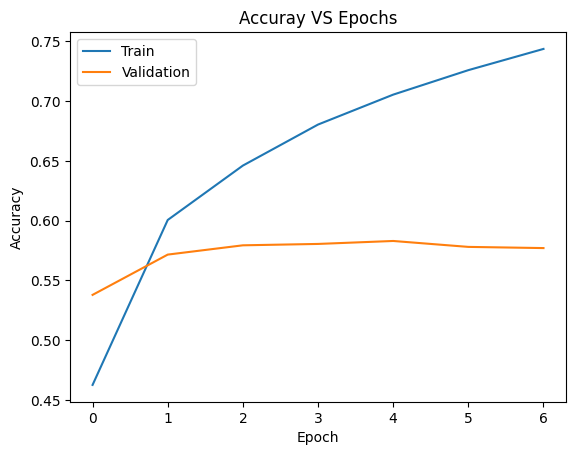

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuray VS Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Resume classificator

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                260416    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 934)               30822     
                                                                 
Total params: 293318 (1.12 MB)
Trainable params: 293318 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
